# Ford GoBike Trips in January 2020
## by Annie Z

## Preliminary Wrangling

> Bay Wheels is a bikeshare system that offers affordable and accessible transportation for Bay Area residents. Bay Wheels stations and bikes are available throughout San Francisco, the East Bay, and San Jose. For this project, I will be exploring and analyzing data from January 2020's Bay Wheels System dataset. Visualizations will explore and display the relationships between different variables.

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df=pd.read_csv('JAN 2020 baywheels-trip data.csv')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
duration_sec               295854 non-null int64
start_time                 295854 non-null object
end_time                   295854 non-null object
start_station_id           146286 non-null float64
start_station_name         146866 non-null object
start_station_latitude     295854 non-null float64
start_station_longitude    295854 non-null float64
end_station_id             145934 non-null float64
end_station_name           146511 non-null object
end_station_latitude       295854 non-null float64
end_station_longitude      295854 non-null float64
bike_id                    295854 non-null int64
user_type                  295854 non-null object
rental_access_method       185746 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 31.6+ MB


In [5]:
#check for duplicated values
df.duplicated().sum()

0

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513847,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


##### Cleaning

In [7]:
# change start_time & end_time to datetime format
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [8]:
#check for null values
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

In [9]:
#keeping only values that are not null

df=df[df['start_station_id'].isnull() == False]

In [10]:
df=df[df['end_station_id'].isnull() == False] 

In [11]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

In [12]:
df.user_type.value_counts()

Customer      102921
Subscriber     21414
Name: user_type, dtype: int64

In [13]:
#Get weekday of start_time
df['weekday']=df['start_time'].dt.strftime('%a')

In [14]:
df['weekday'].value_counts()

Fri    23426
Wed    22515
Thu    21793
Tue    18914
Mon    18370
Sat    10408
Sun     8909
Name: weekday, dtype: int64

In [15]:
# Get the hour of the day from the start_time value
df['hour'] = df['start_time'].dt.strftime('%H')

In [16]:
df['hour'].value_counts()

08    16019
17    14774
09    11497
18    11114
16     9556
07     7067
19     6641
15     6295
10     5751
12     5318
11     5285
14     5237
13     5176
20     3803
21     2879
06     2618
22     1729
23     1127
00      715
05      708
01      471
02      282
04      176
03       97
Name: hour, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124335 entries, 0 to 292109
Data columns (total 16 columns):
duration_sec               124335 non-null int64
start_time                 124335 non-null datetime64[ns]
end_time                   124335 non-null datetime64[ns]
start_station_id           124335 non-null float64
start_station_name         124335 non-null object
start_station_latitude     124335 non-null float64
start_station_longitude    124335 non-null float64
end_station_id             124335 non-null float64
end_station_name           124335 non-null object
end_station_latitude       124335 non-null float64
end_station_longitude      124335 non-null float64
bike_id                    124335 non-null int64
user_type                  124335 non-null object
rental_access_method       14227 non-null object
weekday                    124335 non-null object
hour                       124335 non-null object
dtypes: datetime64[ns](2), float64(6), int64(2), object(6)
memory usag

### What is the structure of your dataset?

- duration_sec: duration of each trip in seconds
- start_time & end_time: start times and end times for each trip
- start_station_id, start_station_name, start_station_latitude, start_station_longitude: shows starting station's information with its location   
- end_station_id, end_station_name, end_station_latitude, end_station_longitude: shows destination station's information with its location 
- bike_id: identifies the rented bike
- user_type: identifies user as a subscriber or customer
- weekday: identifies the week day that the bike was rented out
- hour: identifies the hour of the day in which bikes were rented out


### What is/are the main feature(s) of interest in your dataset?

> weekday, hour, & user_type will be the main features of interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, weekday, user_type, & hour

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [18]:
df['weekday'].describe()

count     124335
unique         7
top          Fri
freq       23426
Name: weekday, dtype: object

### Question: What day of the week in January 2020 was GoBike rentals the highest?

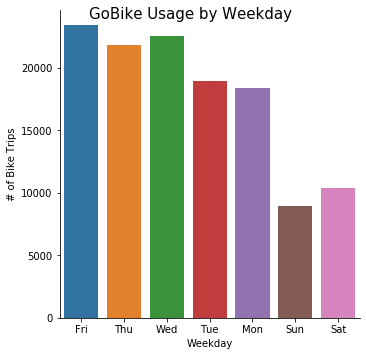

In [19]:
plot = sb.catplot(data = df, x = 'weekday', kind = 'count', order=None)

plot.set_axis_labels('Weekday', '# of Bike Trips'),

plot.fig.suptitle('GoBike Usage by Weekday', fontsize = 15);


#### Observation: The above chart shows the # of bike trips by weekday. Friday seems to be the most popular day to rent a bike as it has the highest number of bike rentals.

### Question: Do subscribers or customers rent more Gobikes?

In [20]:
df.user_type.describe()

count       124335
unique           2
top       Customer
freq        102921
Name: user_type, dtype: object

In [21]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,124335.000000,124335.000000,124335.000000,124335.000000,124335.000000,124335.000000,124335.000000,124335.000000
mean,793.864431,169.764829,37.778441,-122.361903,161.912905,37.776333,-122.352754,65688.421804
std,1903.587568,139.392848,0.080370,0.100342,138.445014,0.313440,0.986461,178882.606705
min,60.000000,3.000000,37.309014,-122.476104,3.000000,0.000000,-122.476104,12.000000
25%,355.000000,56.000000,37.770407,-122.416040,44.000000,37.771058,-122.411738,3424.000000
50%,566.000000,125.000000,37.780955,-122.398285,116.000000,37.781074,-122.397437,10605.000000
75%,884.000000,256.000000,37.798572,-122.291415,247.000000,37.800002,-122.293528,12350.000000
max,86221.000000,506.000000,37.880222,-121.864021,506.000000,37.880222,0.000000,998430.000000


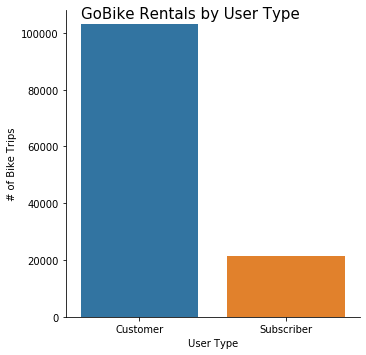

In [22]:
plot = sb.catplot(data = df, x = 'user_type', kind = 'count')

plot.set_axis_labels('User Type', '# of Bike Trips'),

plot.fig.suptitle('GoBike Rentals by User Type', fontsize = 15);

#### Observation: The above chart shows the # of bike trips by user type. More customers rented Ford GoBikes than subscribers did.

### Question: How long are typical GoBike trips?

In [23]:
df.duration_sec.describe()

count    124335.000000
mean        793.864431
std        1903.587568
min          60.000000
25%         355.000000
50%         566.000000
75%         884.000000
max       86221.000000
Name: duration_sec, dtype: float64

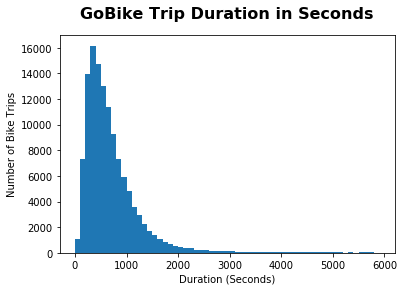

In [24]:
bin_edges = np.arange(start=0, stop=6000, step=100)

plt.hist(data = df, x = 'duration_sec', bins = bin_edges);

plt.title("GoBike Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Number of Bike Trips');

#### Observation: The above histogram shows that most GoBike trips fall under 1000 seconds or under ~17 minutes. The average GoBike trip is approximately 794 seconds or ~13 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Fridays seem to be the most popular day of the week to rent a GoBike, followed by Wednesday. People may be more inclined to rent bikes on Fridays and use them overnight into the weekend. Saturdays and Sundays had the least number of bike rentals, but looking into end_time of respective dates might be helpful as it would account for overnight rentals that had already been made.

> There seem to be more pay-by-rental customers rather than subscribers who rented GoBikes during January 2020.

> Most GoBike trips fall under 1000 seconds/ ~17 minutes. The average GoBike trip is approximately 794 seconds or ~13 minutes.

> No transformations were needed during this process.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some outliers for the trip duration times, these may be overnight rentals. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [25]:
#To find Gobike ride duration in minutes and hours for easier visualizations:
df['duration_min'] = df['duration_sec']/60

In [26]:
df['duration_hour'] = df['duration_min']/60

In [27]:
#Change to correct datatypes
df['duration_hour']=df['duration_hour'].astype(int)
df['duration_min']=df['duration_min'].astype(int)
df['hour']=df['hour'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124335 entries, 0 to 292109
Data columns (total 18 columns):
duration_sec               124335 non-null int64
start_time                 124335 non-null datetime64[ns]
end_time                   124335 non-null datetime64[ns]
start_station_id           124335 non-null float64
start_station_name         124335 non-null object
start_station_latitude     124335 non-null float64
start_station_longitude    124335 non-null float64
end_station_id             124335 non-null float64
end_station_name           124335 non-null object
end_station_latitude       124335 non-null float64
end_station_longitude      124335 non-null float64
bike_id                    124335 non-null int64
user_type                  124335 non-null object
rental_access_method       14227 non-null object
weekday                    124335 non-null object
hour                       124335 non-null int64
duration_min               124335 non-null int64
duration_hour         

In [29]:
df['duration_min'].describe()

count    124335.000000
mean         12.740427
std          31.727792
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max        1437.000000
Name: duration_min, dtype: float64

### Question: How are trips distributed during the week by User Type?

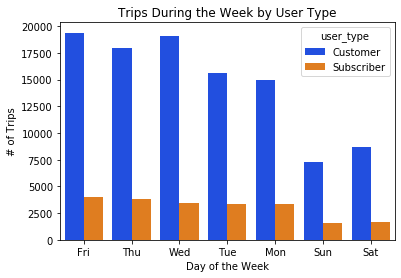

In [30]:
sb.countplot(data=df,x='weekday', palette='bright', hue='user_type')
plt.title('Trips During the Week by User Type')
plt.xlabel('Day of the Week')
plt.ylabel('# of Trips');

#### Observation: The Clustered bar chart above shows the relationhip between user types and # of trips. Fridays seem to be when customer and suscribers alike prefer to rent the most bikes/make the most trips. 

### Question: What times of the day are GoBikes being rented the most?

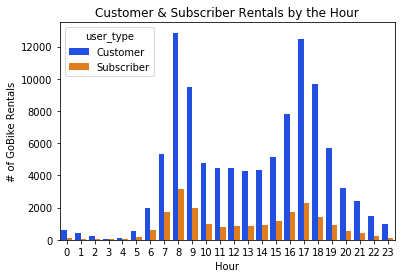

In [31]:
sb.countplot(data=df, x='hour', palette='bright',hue='user_type')
plt.title('Customer & Subscriber Rentals by the Hour')
plt.xlabel('Hour')
plt.ylabel('# of GoBike Rentals');

#### Observation: 8:00AM is the most popular time of the day for customers and subscribers to rent out GoBikes, followed by 5:00PM. This may be attributed to rush hour times/work times of people who have to commute. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was easier to visualize the data by converting the duration in seconds to minutes and hours by adding additonal columns respectively. 8:00AM is the most popular time of the day for customers and subscribers to rent out GoBikes, followed by 5:00PM. This may be attributed to rush hour times/work times of people who have to commute. Fridays seem to be when customer and suscribers alike prefer to rent the most bikes/make the most trips. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The average GoBike trip lasted approximately 13 minutes and the longest GoBike trip lasted 1,347 minutes or about 22 hours.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question: How long do subscribers rent GoBikes for throughout the week?

In [32]:
subscriber= df.loc[df['user_type'] == "Subscriber"]

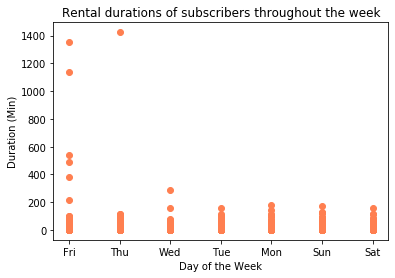

In [33]:
plt.scatter(data = subscriber, x = 'weekday', y = 'duration_min', color='coral')
plt.title('Rental durations of subscribers throughout the week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (Min)');

#### Observation: Subscribers rent GoBikes for longer times on Fridays as compared to other days of the week.

### User Type vs. Duration vs. Weekday 

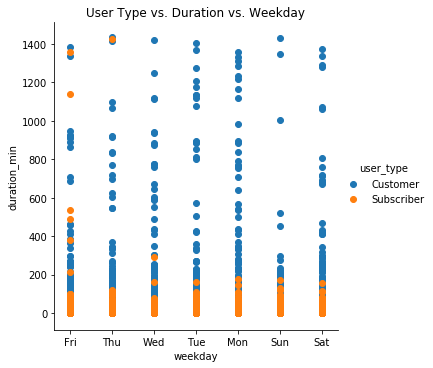

In [40]:
facet= sb.FacetGrid(data = df, hue = 'user_type', size = 5)
facet.map(plt.scatter, 'weekday', 'duration_min')
plt.title('User Type vs. Duration vs. Weekday')
facet.add_legend();

#### Observation: More subscribers rent GoBikes for longer times on Fridays as compared to other days of the week. More customers rent GoBikes for longer periods on Mondays.

### Scatter plots showing correlations between variables: duration (minutes), hour (hour of day rented out), & start_time(timestamp of when bike was rented out)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


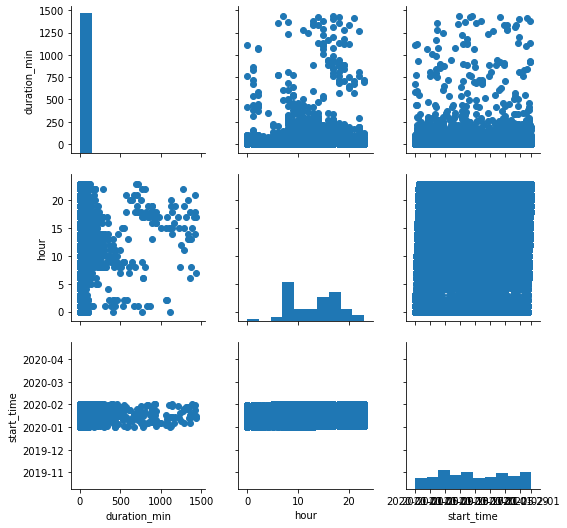

In [41]:
g = sb.PairGrid(data = df, vars = ['duration_min', 'hour', 'start_time'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### Observation: Hour & start_time show a direct correlation because the hour data was extracted directly from start_time. 

### Correlation Heat Map of all variables: 

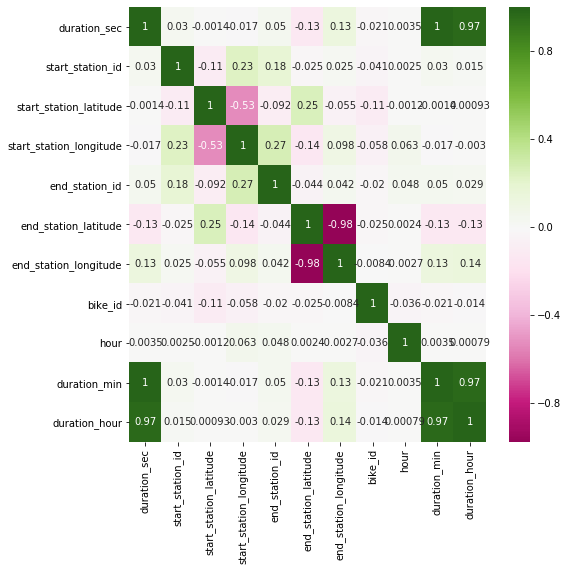

In [42]:
plt.figure(figsize = [8, 8])
heatmap=sb.heatmap(df.corr(), annot = True, cmap = 'PiYG', center = 0);
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5);

#### Observation: The correlation heatmap shows a more positive correlation between the greener boxes. For example, start_station_longitude shows a slight correlation with end_station_id & start_station_latitude also shows a slight correlation with end_station_latitude. Whereas end_station_latitude shows a more negative correlation with end_station_longitude according to the heatmap. When studying correlational relationships, it is important to note that correlation does not imply causation. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> More subscribers rent GoBikes for longer times on Fridays as compared to other days of the week. More customers rent GoBikes for longer periods on Mondays. Comparing the data to previous charts, Friday is also the most popular week day to rent a GoBike for subscribers and customers alike. 

### Were there any interesting or surprising interactions between features?

> It was interesting to see that subscribers usually rent out GoBikes for longer times on Fridays whereas more customers rent for longer periods of time on Mondays.
> Surprisingly, many customers rent GoBikes for longer time intervals on weekdays, possibly suggesting these riders use GoBikes to commute to their jobs.